# Import Necessary libraries

In [1]:
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Scores from three different teaching methods
group_A = [70, 68, 72, 65, 69]  # Traditional lectures
group_B = [78, 74, 80, 76, 77]  # Online videos
group_C = [85, 87, 90, 88, 86]  # Interactive workshops


# Performing One-Way ANOVA

- Using scipy.stats.f_oneway

In [4]:
f_statistic, p_value = stats.f_oneway(group_A, group_B, group_C)

print("F-statistic:", round(f_statistic, 2))
print("p-value:", round(p_value, 4))

F-statistic: 82.77
p-value: 0.0


# Interpreting the results

In [5]:
if p_value < 0.05:
    print("Result: Significant differences exist between the group means.")
else:
    print("Result: No significant differences between the group means.")

Result: Significant differences exist between the group means.


# Generating Data for ANOVA

In [6]:
np.random.seed(0)
# Sample data
data = {
    'Score': [70, 68, 72, 65, 69,   # Lecture-Male
              78, 74, 80, 76, 77,   # Video-Male
              85, 87, 90, 88, 86,   # Workshop-Male
              75, 73, 78, 74, 76,   # Lecture-Female
              80, 77, 82, 79, 78,   # Video-Female
              88, 86, 91, 89, 87],  # Workshop-Female
              
    'Method': ['Lecture']*5 + ['Video']*5 + ['Workshop']*5 + 
              ['Lecture']*5 + ['Video']*5 + ['Workshop']*5,
    
    'Gender': ['Male']*15 + ['Female']*15
}

df = pd.DataFrame(data)
df.sample(10)

,Score,Method,Gender
2,72,Lecture,Male
28,89,Workshop,Female
13,88,Workshop,Male
10,85,Workshop,Male
26,86,Workshop,Female
24,78,Video,Female
27,91,Workshop,Female
11,87,Workshop,Male
17,78,Lecture,Female
22,82,Video,Female


## One way Anova For (Score ~ Method)

### Using Scipy stats method

In [7]:
methods = df["Method"].unique()
scores_by_methods = [df[df["Method"] == method]["Score"] for method in methods]

f_stat, p_value = stats.f_oneway(*scores_by_methods)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 75.84618834080717, P-value: 8.317244651215966e-12


### Using OLS Method and statsmodels library

In [8]:
model = ols("Score ~ C(Method)", data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Method),1252.866667,2.0,75.846188,8.317245e-12
Residual,223.000000,27.0,NaN,NaN


## 2 way Anova

1. **Dependent Variable:**  Score
2. **Independent Variable / Features:** Method and Gender

## Visualizing interaction effect between (Gender and Method)

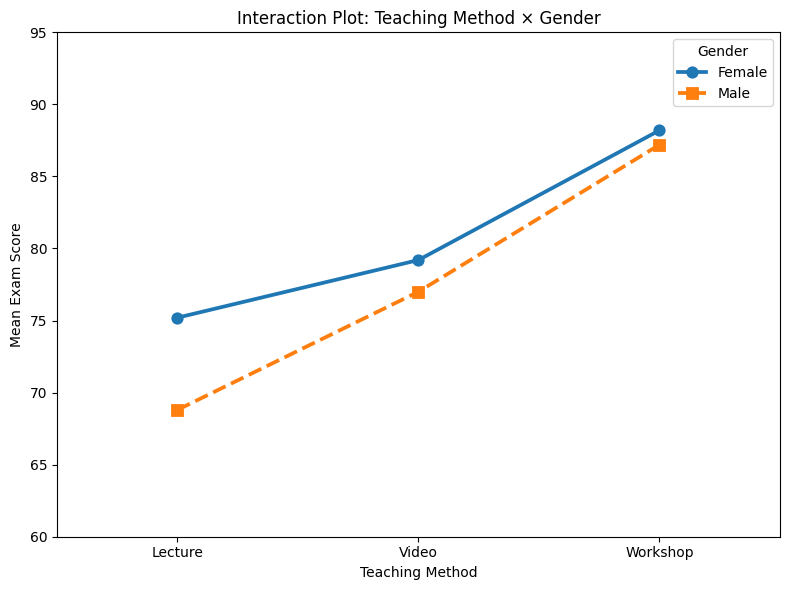

In [9]:
# Teaching Method VS Gender
mean_scores = df.groupby(["Method", "Gender"])["Score"].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.pointplot(
    data=mean_scores,
    x="Method",
    y="Score",
    hue="Gender",
    markers=["o", "s"],
    linestyles=["-", "--"],
)

# Customize plot
plt.title("Interaction Plot: Teaching Method × Gender")
plt.ylabel("Mean Exam Score")
plt.xlabel("Teaching Method")
plt.ylim(60, 95)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

In [10]:
# Build the model for two-way ANOVA
model = ols('Score ~ C(Method) + C(Gender) + C(Method):C(Gender)', data=df).fit() #Score ~ C(Method) * C(Gender) 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     62.03
Date:                Fri, 16 May 2025   Prob (F-statistic):           6.16e-13
Time:                        10:57:01   Log-Likelihood:                -61.502
No. Observations:                  30   AIC:                             135.0
Df Residuals:                      24   BIC:                             143.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [11]:
# Two-way ANOVA (Implemented same as one way except for model fitting in ols)
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Method),1252.866667,2.0,141.833962,5.076311e-14
C(Gender),76.800000,1.0,17.388679,3.426366e-04
C(Method):C(Gender),40.200000,2.0,4.550943,2.110095e-02
Residual,106.000000,24.0,NaN,NaN


**Please feel free to ask any questions**

**&copy;** *Aayush Raj Regmi, 2025*
